Solution took 0.001 sec
[ 1.06242197e+04 -3.42135003e-11  3.12109863e+03 -1.06242197e+04
  3.42135003e-11 -3.12109863e+03]


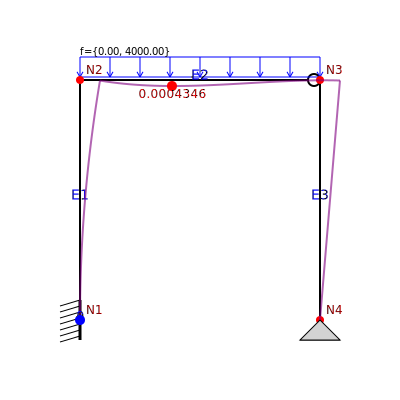

In [10]:
import sys
sys.path.append("..")

from flip import (
    Domain, Solver,
    Material, CrossSection, Node, Beam2D, DofID,
    UniformDistributedLoad,
    plot_model_drawsvg, plot_internal_forces_on_structure,
)


# solver
sol = Solver()
dom = sol.domain

# material and section
mat = Material("C30", e=30e9, g=12e9)
cs = CrossSection("rect", a=0.3*0.5, iy=0.3*0.5**3/12, k=1.0e32, rho=25e3)
dom.add_material(mat)
dom.add_cs(cs)

# nodes
n1 = Node(1, dom, coords=[0.0, 0.0, 0.0], bcs=[DofID.Dx, DofID.Dz, DofID.Ry])
n2 = Node(2, dom, coords=[0.0, 0.0, -5.0])
n3 = Node(3, dom, coords=[5.0, 0.0, -5.0])
n4 = Node(4, dom, coords=[5.0, 0.0, 0.0], bcs=[DofID.Dx, DofID.Dz]) #, lcs={"lx": [0.8660254037844387, 0.0, -0.5], "ly": [0.0, 1.0, 0.0]})
dom.add_node(n1)
dom.add_node(n2)
dom.add_node(n3)
dom.add_node(n4)

# element
e1 = Beam2D(1, dom, nodes=[1, 2], mat="C30", cs="rect", hinges=(False, False))
e2 = Beam2D(2, dom, nodes=[2, 3], mat="C30", cs="rect", hinges=(False, True))
e3 = Beam2D(3, dom, nodes=[3, 4], mat="C30", cs="rect", hinges=(False, False))
dom.add_element(e1)
dom.add_element(e2)
dom.add_element(e3)

# loads
udl = UniformDistributedLoad(fz=4000.0)  # N/m
dom.apply_element_load(2, udl)

# solve
sol.solve()
print (e1._end_forces_local())

# SVG outputs
plot_model_drawsvg(dom, "simple_beam_model.svg", width_px=400, height_px=400, show_deformed=True, deform_scale=4000, margin=80)
#plot_model_diagram(dom, "V", "simple_beam_shear.svg")



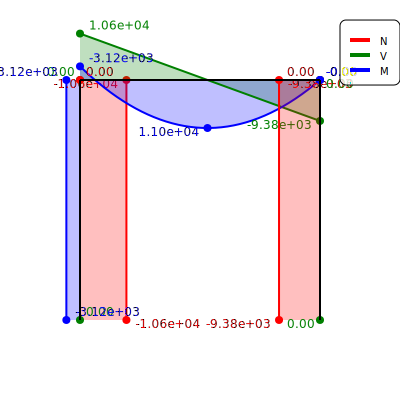

In [9]:
plot_internal_forces_on_structure(dom, "simple_beam_moment.svg", width_px=400, height_px=400, margin=80, scale=1.0, diagrams=["V", "M", "N"] )
